In [95]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import json
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pylab as plt
%matplotlib inline
import sklearn.ensemble as ske


In [96]:
loc_train="/home/siddharth/Documents/HackerEarth/2/train_data.json"
loc_test="/home/siddharth/Documents/HackerEarth/2/test_data.json"


with open(loc_train, 'r') as jsonfile1:
    data_dict_1 = json.load(jsonfile1)
    

with open(loc_test, 'r') as jsonfile2:
    data_dict_2 = json.load(jsonfile2)

train = pd.DataFrame.from_dict(data_dict_1, orient='index')
train.reset_index(level=0, inplace=True)
train.rename(columns = {'index':'ID'},inplace=True)

test = pd.DataFrame.from_dict(data_dict_2, orient='index')
test.reset_index(level=0, inplace=True)
test.rename(columns = {'index':'ID'},inplace=True)


In [97]:
train['segment']=train['segment'].map({'neg':0,'pos':1})
target=train['segment']
train.drop('segment',axis=1, inplace=True)
#Important Cities and Genres, according to code below
city_im=["navi mumbai","delhi","mumbai","bangalore","gurgaon","chennai","hyderabad","new delhi"]
genre_im=["Cricket","Drama","Romance","Reality","TalkShow","Comedy","Family","Action"]
train.shape

(200000, 6)

In [98]:
combined=train.append(test)
combined.reset_index(inplace=True)
combined.drop('index',1,inplace=True)
combined.head()

,ID,cities,dow,genres,titles,tod
0,train-1,"gurgaon:55494,delhi:31892","1:3412,3:15878,2:1737,5:10975,4:20974,7:17820,...","Cricket:82379,Kabaddi:255,Reality:4751","Top Raids: Haryana vs Services SCB:103,Day 4: ...","10:26,13:331,12:323,20:21864,21:16233,17:7953,..."
1,train-10,"delhi:5862,nagar:8916,mumbai:1593","1:5745,3:3025,2:3346,5:123,4:3007,7:1108,6:10","Cricket:15640,Wildlife:730","Dhoni Quits Captaincy:148,Day 4: India Move in...","11:1661,10:384,20:401,21:798,22:221,16:525,19:..."
2,train-100,navi mumbai:4142,3:4142,"LiveTV:13,Football:4129","Star Sports 4:13,Manchester United vs Everton:...","1:1207,0:2406,2:529"
3,train-1000,"new delhi:4131,chennai:2878,navi mumbai:1339","1:658,3:5867,5:413,4:1339,7:71","TalkShow:658,Cricket:7690","SRH vs RCB:701,KKR vs KXIP:1042,MI vs SRH:2288...","11:71,20:2417,21:1042,23:2288,19:1872,8:658"
4,train-10000,"gurgaon:6077,chennai:4055","1:1641,2:480,4:1445,7:1663,6:4900","Drama:5503,Cricket:3283,Reality:1345","MI vs KKR:304,Yeh Rishta Kya Kehlata Hai:5449,...","20:158,22:4139,17:67,23:1510,19:288,18:56,0:23..."


In [99]:
#cn=pd.DataFrame()
#cn['ID']=train['ID']
#cn['cities']=train['cities']
#cn['cities_name']=train['cities_name']
#df=pd.DataFrame()
#df=cn['cities_name'].apply(lambda x: pd.Series(x)).stack().reset_index(level=1, drop=True).to_frame('cities_name').join(cn[['ID']], how='left')
#df['cities_name'].value_counts()

#-----------
#cn=pd.DataFrame()
#cn['ID']=train['ID']
#cn['genres']=train['genres']
#cn['genre_name']=train['genre_name']
#df=pd.DataFrame()
#df=cn['genre_name'].apply(lambda x: pd.Series(x)).stack().reset_index(level=1, drop=True).to_frame('genre_name').join(cn[['ID']], how='left')
#df['genre_name'].value_counts()

In [100]:
def time(x):
    l=len(x.split(","))
    sum=0
    maxm=[]
    for i in range(l):
        t=(x.split(',')[i].split(':')[1].strip())
        sum+=int(t)
    return sum/60

In [101]:
def leng(x):
    l=len(x.split(","))
    return l

In [102]:
def maxm(x):
    l=len(x.split(","))
    m=[]
    for i in range(l):
        t=(x.split(',')[i].split(':')[1].strip())
        m.append(int(t))
    return max(m)/60        

In [103]:
def get_names(x):
    l=len(x.split(","))
    sum=[]
    for i in range(l):
        t=x.split(',')[i].split(':')[0].strip()
        sum.append(t)
    return (sum)

In [104]:
def city_imp(x,y):
    l=len(x)
    for i in range(l):
        if (x[i] in y):
            return 1
    return 0

In [105]:
combined['time']=combined['dow'].map(lambda x: time(x))
#combined['n_cities']=combined['cities'].map(lambda x: leng(x))
combined['n_titles']=combined['titles'].map(lambda x: leng(x))
combined['n_dow']=combined['dow'].map(lambda x: leng(x))
#combined['n_tod']=combined['tod'].map(lambda x: leng(x))
#combined['Max_time_dow']=combined['dow'].map(lambda x: maxm(x))
combined['cities_name']=combined['cities'].map(lambda x: get_names(x))
combined['genre_name']=combined['genres'].map(lambda x: get_names(x))
combined['city_flag']=combined['cities_name'].map(lambda x: city_imp(x,city_im))
combined['dow_count']=combined['dow'].map(lambda x: get_names(x))

#combined['tod_count']=combined['tod'].map(lambda x: get_names(x))

#combined['genre_flag']=combined['genre_name'].map(lambda x: city_imp(x,genre_im))

                
genre_concat=combined['genre_name'].str.join(sep='*').str.get_dummies(sep='*')
dow_count_concat=combined['dow_count'].str.join(sep='*').str.get_dummies(sep='*')
#tod_count_concat=combined['tod_count'].str.join(sep='*').str.get_dummies(sep='*')



combined= combined.join(genre_concat)
combined=combined.join(dow_count_concat)


#combined=combined.join(tod_count_concat)

combined.head()

,ID,cities,dow,genres,titles,tod,time,n_titles,n_dow,cities_name,...,Travel,Volleyball,Wildlife,1,2,3,4,5,6,7
0,train-1,"gurgaon:55494,delhi:31892","1:3412,3:15878,2:1737,5:10975,4:20974,7:17820,...","Cricket:82379,Kabaddi:255,Reality:4751","Top Raids: Haryana vs Services SCB:103,Day 4: ...","10:26,13:331,12:323,20:21864,21:16233,17:7953,...",1456.266667,60,7,"[gurgaon, delhi]",...,0,0,0,1,1,1,1,1,1,1
1,train-10,"delhi:5862,nagar:8916,mumbai:1593","1:5745,3:3025,2:3346,5:123,4:3007,7:1108,6:10","Cricket:15640,Wildlife:730","Dhoni Quits Captaincy:148,Day 4: India Move in...","11:1661,10:384,20:401,21:798,22:221,16:525,19:...",272.733333,70,7,"[delhi, nagar, mumbai]",...,0,0,1,1,1,1,1,1,1,1
2,train-100,navi mumbai:4142,3:4142,"LiveTV:13,Football:4129","Star Sports 4:13,Manchester United vs Everton:...","1:1207,0:2406,2:529",69.033333,2,1,[navi mumbai],...,0,0,0,0,0,1,0,0,0,0
3,train-1000,"new delhi:4131,chennai:2878,navi mumbai:1339","1:658,3:5867,5:413,4:1339,7:71","TalkShow:658,Cricket:7690","SRH vs RCB:701,KKR vs KXIP:1042,MI vs SRH:2288...","11:71,20:2417,21:1042,23:2288,19:1872,8:658",139.133333,8,5,"[new delhi, chennai, navi mumbai]",...,0,0,0,1,0,1,1,1,0,1
4,train-10000,"gurgaon:6077,chennai:4055","1:1641,2:480,4:1445,7:1663,6:4900","Drama:5503,Cricket:3283,Reality:1345","MI vs KKR:304,Yeh Rishta Kya Kehlata Hai:5449,...","20:158,22:4139,17:67,23:1510,19:288,18:56,0:23...",168.816667,11,5,"[gurgaon, chennai]",...,0,0,0,1,1,0,1,0,1,1


In [106]:
combined.columns

Index(['ID', 'cities', 'dow', 'genres', 'titles', 'tod', 'time', 'n_titles',
       'n_dow', 'cities_name', 'genre_name', 'city_flag', 'dow_count',
       'Action', 'Athletics', 'Awards', 'Badminton', 'Boxing', 'Comedy',
       'Cricket', 'Crime', 'Documentary', 'Drama', 'Family', 'Football',
       'Formula1', 'FormulaE', 'Hockey', 'Horror', 'IndiaVsSa', 'Kabaddi',
       'Kids', 'LiveTV', 'Mythology', 'NA', 'Reality', 'Romance', 'Science',
       'Sport', 'Swimming', 'Table Tennis', 'TalkShow', 'Teen', 'Tennis',
       'Thriller', 'Travel', 'Volleyball', 'Wildlife', '1', '2', '3', '4', '5',
       '6', '7'],
      dtype='object')

In [107]:
combined.drop(['ID','genres','titles','cities','tod','dow'],axis=1, inplace=True)
combined.drop(['cities_name','genre_name','dow_count'],axis=1, inplace=True)
combined.head()

,time,n_titles,n_dow,city_flag,Action,Athletics,Awards,Badminton,Boxing,Comedy,...,Travel,Volleyball,Wildlife,1,2,3,4,5,6,7
0,1456.266667,60,7,1,0,0,0,0,0,0,...,0,0,0,1,1,1,1,1,1,1
1,272.733333,70,7,1,0,0,0,0,0,0,...,0,0,1,1,1,1,1,1,1,1
2,69.033333,2,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,139.133333,8,5,1,0,0,0,0,0,0,...,0,0,0,1,0,1,1,1,0,1
4,168.816667,11,5,1,0,0,0,0,0,0,...,0,0,0,1,1,0,1,0,1,1


In [108]:
train_new=combined[:200000]
test_new=combined[200000:]

In [109]:
train_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 46 columns):
time            200000 non-null float64
n_titles        200000 non-null int64
n_dow           200000 non-null int64
city_flag       200000 non-null int64
Action          200000 non-null int64
Athletics       200000 non-null int64
Awards          200000 non-null int64
Badminton       200000 non-null int64
Boxing          200000 non-null int64
Comedy          200000 non-null int64
Cricket         200000 non-null int64
Crime           200000 non-null int64
Documentary     200000 non-null int64
Drama           200000 non-null int64
Family          200000 non-null int64
Football        200000 non-null int64
Formula1        200000 non-null int64
FormulaE        200000 non-null int64
Hockey          200000 non-null int64
Horror          200000 non-null int64
IndiaVsSa       200000 non-null int64
Kabaddi         200000 non-null int64
Kids            200000 non-null int64
LiveTV       

In [110]:
X,x,Y,y=train_test_split(train_new, target,test_size=0.3)

In [124]:
clf_gb = ske.GradientBoostingClassifier(n_estimators=100,learning_rate=0.2,subsample=0.8)
clf_gb.fit (X,Y)
clf_gb.score (x,y)
#100-0.92436666666666667
#30-0.92436666666666667
#10-0.92438333333333333
#50-0.92436666666666667


#0.92556666666666665
#10 0.9240666666666667
#30 0.9240666666666667
#300 0.92383333333333328 

0.92369999999999997

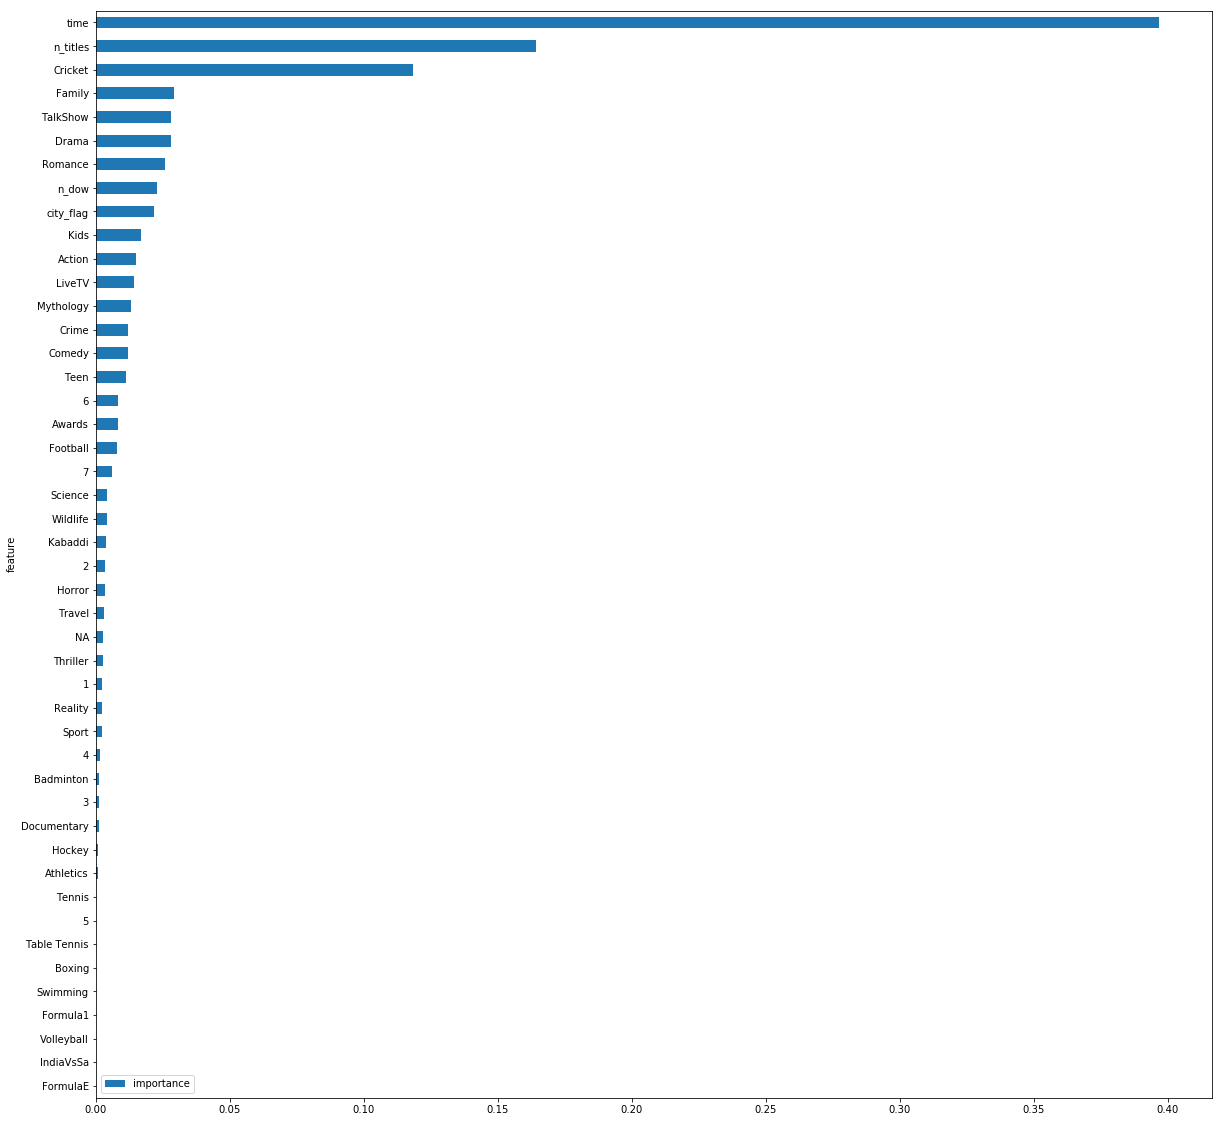

In [125]:
features = pd.DataFrame()
features['feature'] = train_new.columns
features['importance'] = clf_gb.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)
features.plot(kind='barh',figsize=(20, 20))


In [108]:
pred_prob=clf_gb.predict_proba(test_new)

In [109]:
output=pd.DataFrame(pred_prob)
output.drop(0,1,inplace=True)
output['ID']=test.ID
output.rename(columns={1:'segment'},inplace=True)

In [110]:
output.info()
output[['ID','segment']].to_csv("/home/siddharth/Documents/HackerEarth/2/output_gb7.csv",index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 2 columns):
segment    100000 non-null float64
ID         100000 non-null object
dtypes: float64(1), object(1)
memory usage: 1.5+ MB
